In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [2]:
data = pd.read_csv('census_income.csv')

In [3]:
data = data.dropna()  # Remove rows with missing values
features = data[['age', 'education.num', 'hours.per.week']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [5]:
silhouette_scores = []
k_values = range(2, 11)


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_features, labels))

best_k = k_values[np.argmax(silhouette_scores)]
print(f"Best value for K: {best_k}")


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

Best value for K: 7


In [13]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(scaled_features)
print(kmeans.fit(scaled_features))

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)


In [7]:
labels = kmeans.fit(scaled_features)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
data['labels'] = labels
print(data['labels'])

0        KMeans(n_clusters=7, random_state=42)
1        KMeans(n_clusters=7, random_state=42)
2        KMeans(n_clusters=7, random_state=42)
3        KMeans(n_clusters=7, random_state=42)
4        KMeans(n_clusters=7, random_state=42)
                         ...                  
32555    KMeans(n_clusters=7, random_state=42)
32556    KMeans(n_clusters=7, random_state=42)
32557    KMeans(n_clusters=7, random_state=42)
32558    KMeans(n_clusters=7, random_state=42)
32559    KMeans(n_clusters=7, random_state=42)
Name: labels, Length: 32560, dtype: object


In [9]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

for i in range(best_k):
    print(f"\nCluster {i+1} Center:")
    print(f"age: {cluster_centers[i][0]}")
    print(f"education.num: {cluster_centers[i][1]}")
    print(f"hours.per.week: {cluster_centers[i][2]}")



Cluster 1 Center:
age: 44.87930221593588
education.num: 4.439886845827437
hours.per.week: 40.00471475719001

Cluster 2 Center:
age: 40.14159292035398
education.num: 10.761831473643708
hours.per.week: 65.61369757599077

Cluster 3 Center:
age: 39.09217758985201
education.num: 13.368287526427073
hours.per.week: 42.83030303030304

Cluster 4 Center:
age: 51.41629515757108
education.num: 9.585703305149885
hours.per.week: 41.23320522674865

Cluster 5 Center:
age: 23.304767840448722
education.num: 9.41009660330321
hours.per.week: 20.371455282019287

Cluster 6 Center:
age: 29.295877454508094
education.num: 9.308625475480625
hours.per.week: 41.182070525341835

Cluster 7 Center:
age: 65.28604294478528
education.num: 9.886503067484663
hours.per.week: 17.799846625766897


In [10]:
print("\nSilhouette Score:", silhouette_score(scaled_features, kmeans.labels_))
print("Inertia:", kmeans.inertia_)
print(data['labels'])



Silhouette Score: 0.336410134012957
Inertia: 30591.550737998856
0        KMeans(n_clusters=7, random_state=42)
1        KMeans(n_clusters=7, random_state=42)
2        KMeans(n_clusters=7, random_state=42)
3        KMeans(n_clusters=7, random_state=42)
4        KMeans(n_clusters=7, random_state=42)
                         ...                  
32555    KMeans(n_clusters=7, random_state=42)
32556    KMeans(n_clusters=7, random_state=42)
32557    KMeans(n_clusters=7, random_state=42)
32558    KMeans(n_clusters=7, random_state=42)
32559    KMeans(n_clusters=7, random_state=42)
Name: labels, Length: 32560, dtype: object


TypeError: float() argument must be a string or a real number, not 'KMeans'

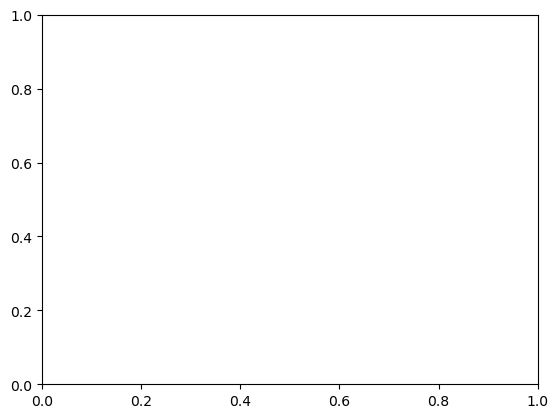

In [11]:
plt.scatter(data['age'], data['hours.per.week'], c=data['labels'], cmap='viridis')
plt.scatter(cluster_centers[1, 0], cluster_centers[1, 2], c='red', marker='X')
plt.xlabel('age')
plt.ylabel('hours.per.week')
plt.title('K-means Clustering')
plt.show()
